In [43]:
%%HTML
<link rel="stylesheet" href="style.css"/>


<h1><p class="fragment"><span class="presentation_title"> Projet d'analyse de donnée:</span></p></h1>

<h2><p class="fragment"><span class="presentaion_subTitle"> Historique du Lego</span></p></h2>

<h3><p class="fragment fade-up"><span class="presentation_name"> Préparé par Youssef Najjar</span></p></h3>

<h1>Avoir une information sur l'architecture de dataset</h1> 
<p class="fragment fade-up">ici le schéma de dataset</p>
<p class="fragment fade-in-then-out"><img src="./data/schema.png"/></p>

<h1>1. importer les donnees</h1>

In [2]:
import pandas as pd
#on va travailler sur le couleur 
colors=pd.read_csv("./data/colors.csv")
colors=colors.set_index("id")
colors.head()

,name,rgb,is_trans
id,,,
-1,Unknown,0033B2,f
0,Black,05131D,f
1,Blue,0055BF,f
2,Green,237841,f
3,Dark Turquoise,008F9B,f


<h1>2. voir s'il ya des valeurs manquantes</h1>

In [3]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135 entries, -1 to 9999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   name      135 non-null    object
 1   rgb       135 non-null    object
 2   is_trans  135 non-null    object
dtypes: object(3)
memory usage: 4.2+ KB


# 3. Explorer les couleurs
<span style="color:black">après avoir lu les données sur les couleurs, nous allons maintenant les comprendre. </span>

In [4]:
#get the distinct colors available
numberOfColors=colors['name'].nunique()
print("le nombre des couleur exist sont : ",numberOfColors)


le nombre des couleur exist sont :  135


# 4. Couleurs transparentes dans les lego
<span style="color:black">les données de couleurs ont une colonne nommée is_trans qui indique si une couleur est trasparente ou non . il serait intéressant d'explorer la distribution des couleurs <b>transparents</b> vs <b>non-transparents</b> </span>

In [6]:
colors_sumary =colors.groupby('is_trans').count()

print(colors_sumary)

          name  rgb
is_trans           
f          107  107
t           28   28


<p class="fragment fade-up task-conclution">Avec le dernier résultat, nous pouvons dire que la plupart des couleurs utilisées dans Lego sont non-transparentes, donc la couleur a une importance dans ce jeu. </p>

# 5. Explorer les jeux de lego
<span style="color:black">étudier l'évolution du nombre moyen de pièces dans les jeux lego au fil des ans.</span>

In [53]:
import matplotlib as plot
sets=pd.read_csv('./data/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [70]:
parts_by_year=sets.groupby('year').mean()
print(parts_by_year.head())


        theme_id  num_parts
year                       
1950  370.285714  10.142857
1953  371.000000  16.500000
1954  371.142857  12.357143
1955  375.678571  36.857143
1956  381.833333  18.500000


<AxesSubplot:xlabel='year', ylabel='num_parts'>

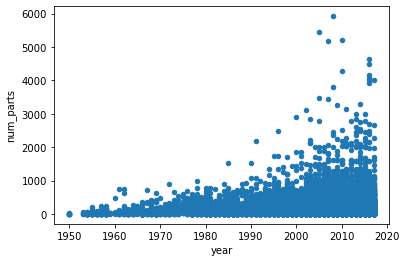

In [69]:
sets.plot.scatter(x='year',y='num_parts')

<p class=" fragment fade-up task-conclution">avec cette figure, nous pouvons dire que le nombre de pièces augmente au cours du temps, ce qui signifie qu'il y a beaucoup de ventes, donc nous pouvons dire que le nombre d'utilisateurs augmente au cours des années aussi </p>

# 6. thèmes lego depuis des années
<span style="color:black"> nous allons avoir une idée du nombre de thèmes expédiés au fil des ans</span>

In [57]:
themes_by_year=sets.groupby('year')[['theme_id']].nunique()
themes_by_year.head(100)

,theme_id
year,
1950,2
1953,1
1954,2
1955,4
1956,3
...,...
2013,93
2014,92
2015,98


<p class=" fragment fade-up task-conclution">on peut voir qu'au fil des ans le nombre de thèmes augmente </p>

# 7. emballer tout ça
<span style="color:black">nous avons exploré quelques tendances intéressantes autour des pièces de couleurs et des thèmes avant de conclure</span>



In [68]:
#get the number of unique themes released in 1999
num_themes=themes_by_year.loc[1999,'theme_id']
print(num_themes)
print("---------")
print(themes_by_year.loc[2015])
print("---------")
print(themes_by_year['theme_id'].max())

71
---------
theme_id    98
Name: 2015, dtype: int64
---------
98


# 8.Conclution

dans ce projet nous avons explorer la dataset do Lego et nous avons travailler sur les deux facteurs qui sont le couleur et les thèmes et on remarque que c'est deux facteur ont une grande importance au coter vente de ce jeux